# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("seaborn-white")
# sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367674 entries, 0 to 2367673
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21109
Address                             12
Zip Code                         14915
Council District                 48095
APD Sector                        9522
APD District                     10014
PRA                              11355
Census Tract                    738227
Clearance Status                615687
Clearance Date                  346512
UCR Category                   1556928
Category Description           1556928
X-coordinate                     10737
Y-coordinate                     10737
Latitude                         40387
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20191671388       BURGLARY OF RESIDENCE                   500   
4      20195022771             THEFT FROM AUTO                   603   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   
4               N  06/04/2019 10:00:00 AM    06/04/2019         1000.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  06/16/2019 10:00:00 PM  06/16/2019       2200.0   
4  06/04/2019 12:34:00 PM  06/04/2019       1234.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   
4             RESIDENCE / HOME               12433 DESSAU RD   78754.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3              10.0         BA            8  256.0         17.51   
4               1.0         ED            6  206.0         18.42   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     09/18/2019          220             Burglary   
4                N     06/07/2019          23F                Theft   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3111039.0     3111039.0  30.364987 -97.750587   
4     3143646.0     3143646.0  30.389739 -97.646477   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3  (30.36498691, -97.75058749)  
4  (30.38973892, -97.64647714)

Incident Number Highest Offense Description  Highest Offense Code  \
2367669    2003920481011        THEFT BY SHOPLIFTING                   607   
2367670       2007301238  WARRANT ARREST NON TRAFFIC                  3442   
2367671        200941199  VOCO SOLICITATION PROHIBIT                  3296   
2367672      20135027400                       THEFT                   600   
2367673      20198002009                       THEFT                   600   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2367669               N  02/17/2003 04:26:00 PM    02/17/2003         1626.0   
2367670               N  01/30/2007 04:10:00 PM    01/30/2007         1610.0   
2367671               N  01/04/2009 03:50:00 PM    01/04/2009         1550.0   
2367672               N  06/19/2013 12:30:00 AM    06/19/2013           30.0   
2367673               N  06/07/2019 06:30:00 PM    06/07/2019         1830.0   

               Report Date Time Report Date  Report Time  \
2367669  02/17/2003 04:26:00 PM  02/17/2003       1626.0   
2367670  01/30/2007 04:10:00 PM  01/30/2007       1610.0   
2367671  01/04/2009 03:50:00 PM  01/04/2009       1550.0   
2367672  06/19/2013 03:43:00 AM  06/19/2013        343.0   
2367673  06/08/2019 01:20:00 PM  06/08/2019       1320.0   

                        Location Type                            Address  \
2367669         GROCERY / SUPERMARKET                  9414 N LAMAR BLVD   
2367670  STREETS / HWY / ROAD / ALLEY    BRODIE LN / W WILLIAM CANNON DR   
2367671  STREETS / HWY / ROAD / ALLEY  MC NEIL DR / N US 183 HWY SVRD NB   
2367672              BAR / NIGHT CLUB                  6528 N LAMAR BLVD   
2367673         GROCERY / SUPERMARKET                     6900 BRODIE LN   

         Zip Code  Council District APD Sector APD District  PRA  \
2367669   78758.0               4.0         ED            1  238   
2367670   78745.0               8.0         DA            7  804   
2367671   78729.0               6.0         AD            4  168   
2367672   78757.0               7.0         ID            7  277   
2367673   78749.0               8.0         DA            4   80   

         Census Tract Clearance Status Clearance Date UCR Category  \
2367669         18.19                N     02/24/2003          23C   
2367670         17.29                C     02/03/2007          NaN   
2367671        204.10              NaN            NaN          NaN   
2367672         15.00                N     06/19/2013          23H   
2367673         17.50                N     09/25/2019          23H   

        Category Description  X-coordinate  Y-coordinate   Latitude  \
2367669                Theft     3127650.0     3127650.0  30.364991   
2367670                  NaN     3087117.0     3087117.0  30.213774   
2367671                  NaN     3104632.0     3104632.0  30.434485   
2367672                Theft     3120354.0     3120354.0  30.333706   
2367673                Theft     3087289.0     3087289.0  30.215773   

         Longitude                     Location  
2367669 -97.697902  (30.36499057, -97.69790197)  
2367670 -97.830385  (30.21377383, -97.83038456)  
2367671 -97.769061  (30.43448458, -97.76906075)  
2367672 -97.721890   (30.3337063, -97.72188999)  
2367673 -97.829788  (30.21577262, -97.82978808)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

699

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2366975 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          INDECENCY WITH A CHILD/CONTACT            True   

                      report_date_time     location_type  \
occurred_date_time                                         
2003-01-01         2009-08-07 14:23:00  RESIDENCE / HOME   
2003-01-01         2010-04-14 14:59:00  RESIDENCE / HOME   
2003-01-01         2012-12-27 16:17:00  RESIDENCE / HOME   
2003-01-01         2009-07-22 11:09:00  RESIDENCE / HOME   
2003-01-01         2017-10-02 21:14:00  RESIDENCE / HOME   

                                             address zip_code  \
occurred_date_time                                              
2003-01-01                           6800 MC NEIL DR  78729.0   
2003-01-01                             1088 PARK PLZ  78753.0   
2003-01-01                           1738 RUTLAND DR  78758.0   
2003-01-01                      1941 GASTON PLACE DR  78723.0   
2003-01-01          1200 BLOCK AUSTIN HIGHLANDS BLVD  78745.0   

                   council_district apd_sector apd_district    pra  \
occurred_date_time                                                   
2003-01-01                      6.0         AD            4  169.0   
2003-01-01                      4.0         ED            3  251.0   
2003-01-01                      4.0         ED            2  219.0   
2003-01-01                      1.0         ID            4  295.0   
2003-01-01                      2.0         FR            4  509.0   

                   census_tract clearance_status clearance_date  \
occurred_date_time                                                
2003-01-01               204.10              NaN            NaT   
2003-01-01                  NaN             True     2010-04-15   
2003-01-01                18.21            False     2012-12-28   
2003-01-01                  NaN            False     2009-07-28   
2003-01-01                  NaN            False     2018-08-02   

                   category_description   latitude  longitude    year  month  \
occurred_date_time                                                             
2003-01-01                          NaN  30.438983 -97.759669  2003.0    1.0   
2003-01-01                          NaN  30.348871 -97.685233  2003.0    1.0   
2003-01-01                          NaN  30.376093 -97.710471  2003.0    1.0   
2003-01-01                          NaN  30.312126 -97.688964  2003.0    1.0   
2003-01-01                          NaN        NaN        NaN  2003.0    1.0   

                    week  day  hour  
occurred_date_time                   
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                               
NaT                        BURGLARY OF VEHICLE           False   
NaT                          SUSPICIOUS PERSON           False   
NaT                              RUNAWAY CHILD           False   
NaT                                        DWI           False   
NaT                          CRIMINAL MISCHIEF           False   

                      report_date_time          location_type  \
occurred_date_time                                              
NaT                2003-05-08 08:29:00  PARKING LOTS / GARAGE   
NaT                2008-01-11 10:33:00                    NaN   
NaT                2004-02-24 22:55:00                    NaN   
NaT                2004-12-30 02:32:00                    NaN   
NaT                2003-04-26 11:09:00  PARKING LOTS / GARAGE   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            600 BARWOOD PARK  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                  E RIVERSIDE DR / PARKER LN  78741.0              3.0   
NaT                       7522 N I 35 SB SVC RD  78752.0              4.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0         18.0   
NaT                        GE            2  381.0         11.0   
NaT                        DA            1  476.0         13.0   
NaT                        HE            1  456.0         14.0   
NaT                        BA            5  264.0         18.0   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False            NaT                Theft   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                            True     2004-12-31                  NaN   
NaT                           False            NaT                  NaN   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.349500 -97.696676   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243228 -97.729313   NaN    NaN   NaN  NaN   NaN  
NaT                 30.337508 -97.701754   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    212845
78753.0    183297
78701.0    173440
78758.0    164219
78704.0    160960
78745.0    151697
78702.0    138362
78744.0    128710
78723.0    123136
78752.0     87670
78759.0     71081
78748.0     70971
78751.0     65745
78705.0     58155
78757.0     56904
78721.0     48020
78749.0     41488
78724.0     37944
78727.0     36926
78703.0     35805
78731.0     29971
78746.0     29165
78729.0     26018
78750.0     24611
78754.0     24068

zip_code
78741.0  0.090493
78753.0  0.077930
78701.0  0.073740
78758.0  0.069819
78704.0  0.068434
78745.0  0.064495
78702.0  0.058826
78744.0  0.054722
78723.0  0.052352
78752.0  0.037274
78759.0  0.030221
78748.0  0.030174
78751.0  0.027952
78705.0  0.024725
78757.0  0.024193
78721.0  0.020416
78749.0  0.017639
78724.0  0.016132
78727.0  0.015699
78703.0  0.015223
78731.0  0.012742
78746.0  0.012400
78729.0  0.011062
78750.0  0.010464
78754.0  0.010233

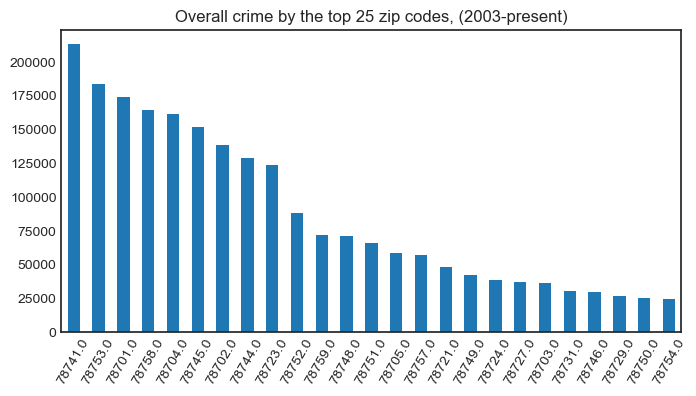

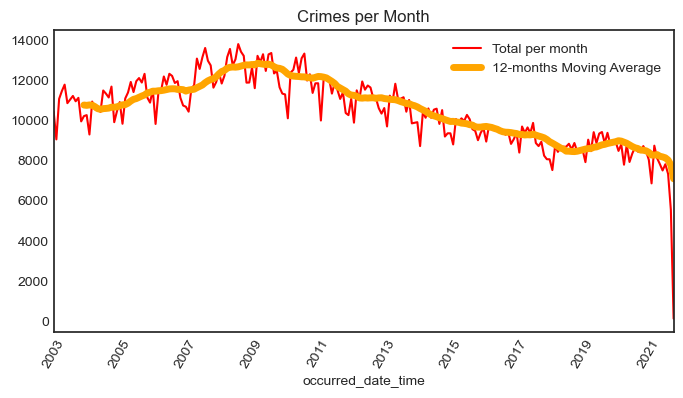

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    # xlabel="Zip Code",
    # ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  234131
THEFT                                                215488
FAMILY DISTURBANCE                                   186289
CRIMINAL MISCHIEF                                    130536
ASSAULT W/INJURY-FAM/DATE VIOL                        80149
BURGLARY OF RESIDENCE                                 78251
DWI                                                   70640
PUBLIC INTOXICATION                                   69322
HARASSMENT                                            65585
DISTURBANCE - OTHER                                   63230

BURGLARY OF VEHICLE  BURGLARY OF RESIDENCE  HARASSMENT  \
occurred_date_time                                                           
2003-01-31                         1225                    328         293   
2003-02-28                         1110                    248         309   
2003-03-31                         1222                    393         363   
2003-04-30                         1396                    398         353   
2003-05-31                         1487                    436         345   
...                                 ...                    ...         ...   
2021-06-30                          356                    148         165   
2021-07-31                          498                    164         139   
2021-08-31                          407                    142         125   
2021-09-30                          226                     95          78   
2021-10-31                            4                      2           1   

                    CRIMINAL MISCHIEF  ASSAULT W/INJURY-FAM/DATE VIOL  \
occurred_date_time                                                      
2003-01-31                        722                             349   
2003-02-28                        594                             342   
2003-03-31                        700                             421   
2003-04-30                        709                             432   
2003-05-31                        750                             424   
...                               ...                             ...   
2021-06-30                        381                             268   
2021-07-31                        397                             289   
2021-08-31                        313                             257   
2021-09-30                        225                             244   
2021-10-31                          3                               4   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  407                 505   4170  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-06-30                           70  126                 799   2313  
2021-07-31                           67  109                 881   2544  
2021-08-31                           81  151                 851   2327  
2021-09-30                           85  124                 676   1753  
2021-10-31                            3    6                  13     36  

[226 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

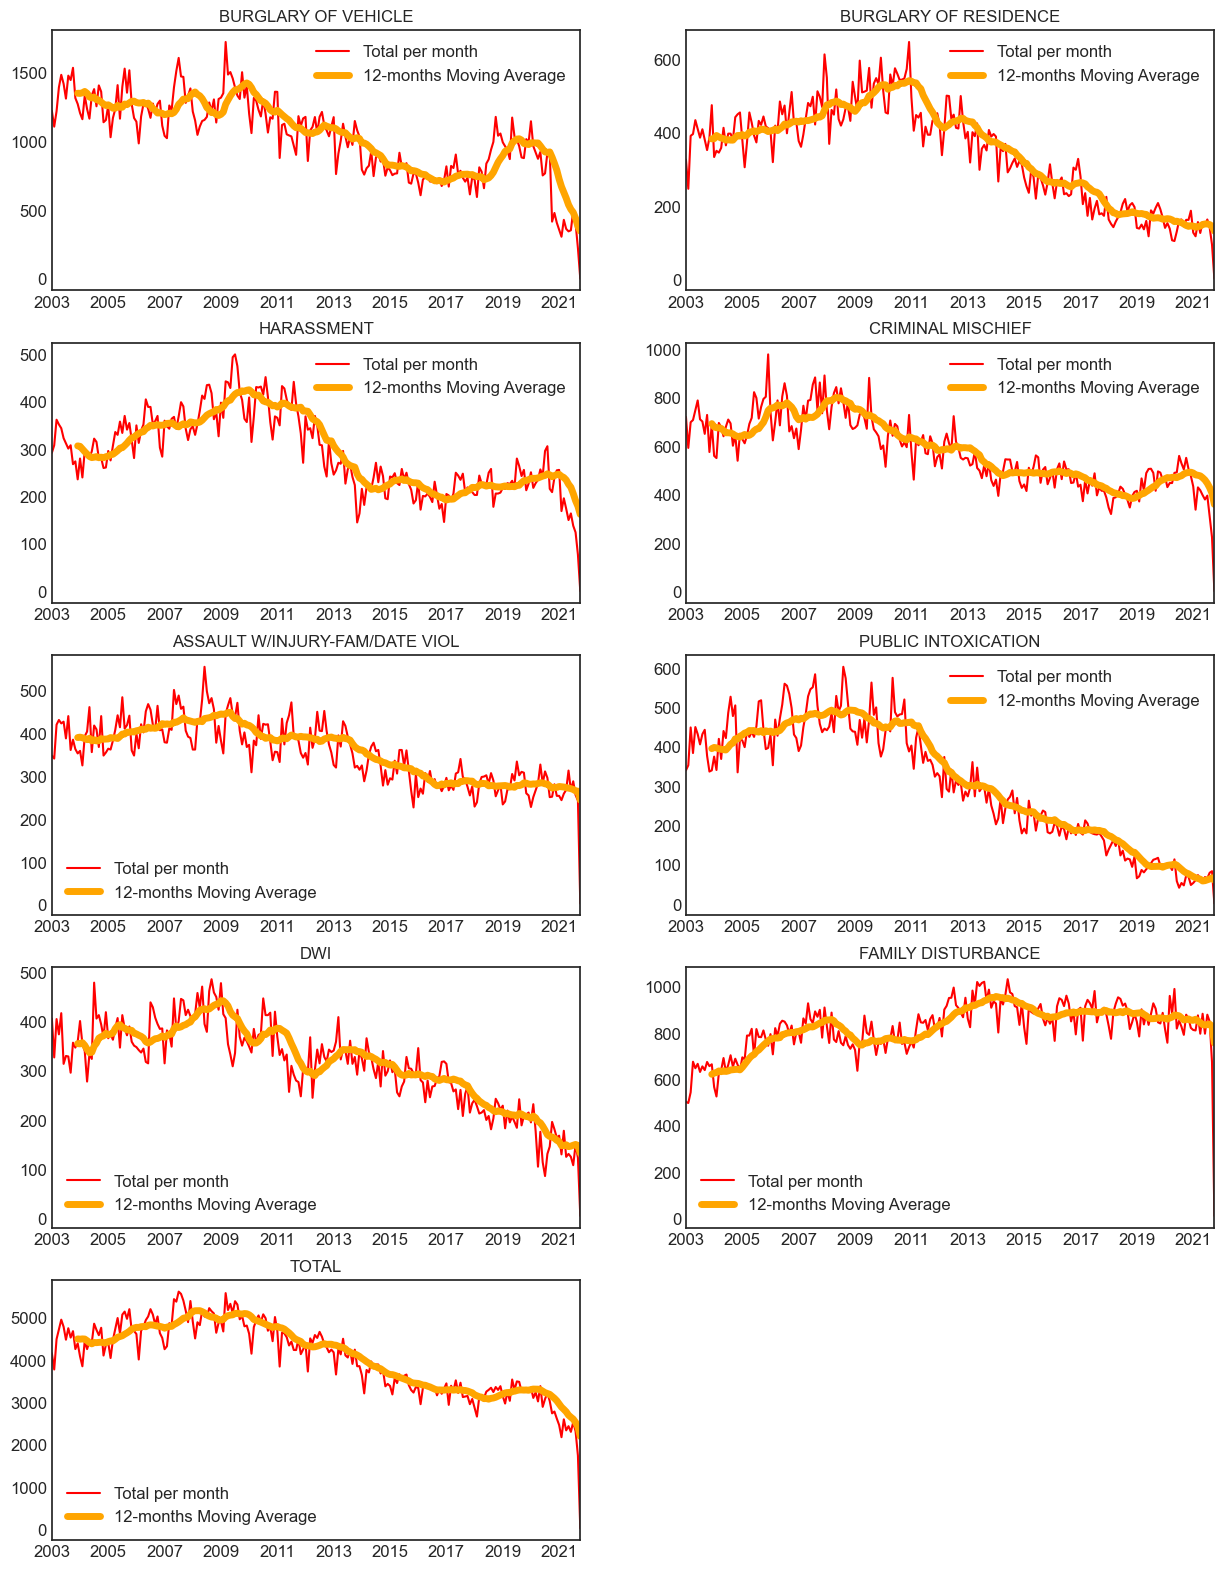

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17324
THEFT                                                 16159
BURGLARY OF VEHICLE                                    9552
WARRANT ARREST NON TRAFFIC                             9057
DWI                                                    8483
ASSAULT WITH INJURY                                    7836
VIOL CITY ORDINANCE - OTHER                            6227
POSS OF DRUG PARAPHERNALIA                             6214
CRIMINAL MISCHIEF                                      6063
CRIMINAL TRESPASS                                      4033
DISTURBANCE - OTHER                                    3470
POSSESSION OF MARIJUANA                                3445
CUSTODY ARREST TRAFFIC WARR                            3023
POSS CONTROLLED SUB/NARCOTIC                           2970
CAMPING IN PARK                                        2811
VOCO - ALCOHOL  CONSUMPTION                            2725
ASSAULT BY CONTACT                                     2706
THEFT OF BICYCLE                                       2618
CRIMINAL TRESPASS/TRANSIENT                            2617
URINATING IN PUBLIC PLACE                              2357
FAMILY DISTURBANCE                                     2284
DOC FIGHTING                                           2186
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1790

highest_offense_description
PUBLIC INTOXICATION                                0.099885
THEFT                                              0.093168
BURGLARY OF VEHICLE                                0.055074
WARRANT ARREST NON TRAFFIC                         0.052220
DWI                                                0.048910
ASSAULT WITH INJURY                                0.045180
VIOL CITY ORDINANCE - OTHER                        0.035903
POSS OF DRUG PARAPHERNALIA                         0.035828
CRIMINAL MISCHIEF                                  0.034957
CRIMINAL TRESPASS                                  0.023253
DISTURBANCE - OTHER                                0.020007
POSSESSION OF MARIJUANA                            0.019863
CUSTODY ARREST TRAFFIC WARR                        0.017430
POSS CONTROLLED SUB/NARCOTIC                       0.017124
CAMPING IN PARK                                    0.016207
VOCO - ALCOHOL  CONSUMPTION                        0.015711
ASSAULT BY CONTACT                                 0.015602
THEFT OF BICYCLE                                   0.015095
CRIMINAL TRESPASS/TRANSIENT                        0.015089
URINATING IN PUBLIC PLACE                          0.013590
FAMILY DISTURBANCE                                 0.013169
DOC FIGHTING                                       0.012604
PROTECTIVE ORDER                                   0.012102
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010321

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

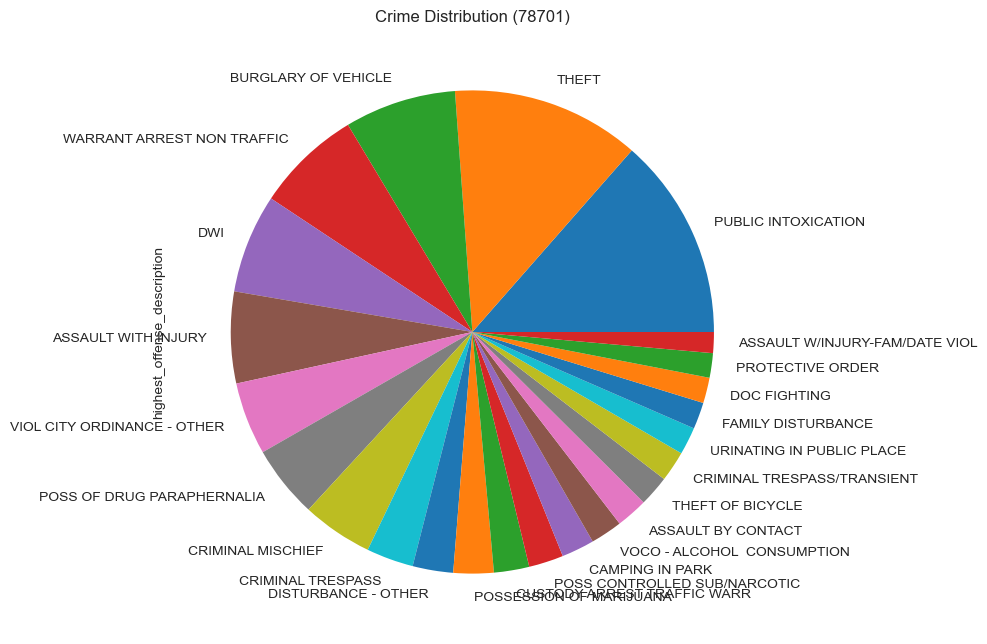

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17365
BURGLARY OF VEHICLE                                   16080
FAMILY DISTURBANCE                                    15180
CRIMINAL MISCHIEF                                      9667
THEFT BY SHOPLIFTING                                   7759
ASSAULT W/INJURY-FAM/DATE VIOL                         7369
BURGLARY OF RESIDENCE                                  6150
DWI                                                    5065
DISTURBANCE - OTHER                                    4905
AUTO THEFT                                             4463
HARASSMENT                                             4343
CUSTODY ARREST TRAFFIC WARR                            4314
POSS OF DRUG PARAPHERNALIA                             3732
ASSAULT WITH INJURY                                    3451
PUBLIC INTOXICATION                                    3372
CRIMINAL TRESPASS                                      3225
POSS CONTROLLED SUB/NARCOTIC                           3035
RUNAWAY CHILD                                          2989
WARRANT ARREST NON TRAFFIC                             2778
POSSESSION OF MARIJUANA                                2695
BURGLARY NON RESIDENCE                                 2554
VIOL CITY ORDINANCE - OTHER                            1861

----------------------------------


highest_offense_description
THEFT                                              0.094737
BURGLARY OF VEHICLE                                0.087726
FAMILY DISTURBANCE                                 0.082816
CRIMINAL MISCHIEF                                  0.052740
THEFT BY SHOPLIFTING                               0.042330
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040203
BURGLARY OF RESIDENCE                              0.033552
DWI                                                0.027633
DISTURBANCE - OTHER                                0.026760
AUTO THEFT                                         0.024348
HARASSMENT                                         0.023694
CUSTODY ARREST TRAFFIC WARR                        0.023536
POSS OF DRUG PARAPHERNALIA                         0.020360
ASSAULT WITH INJURY                                0.018827
PUBLIC INTOXICATION                                0.018396
CRIMINAL TRESPASS                                  0.017594
POSS CONTROLLED SUB/NARCOTIC                       0.016558
RUNAWAY CHILD                                      0.016307
WARRANT ARREST NON TRAFFIC                         0.015156
POSSESSION OF MARIJUANA                            0.014703
BURGLARY NON RESIDENCE                             0.013934
VIOL CITY ORDINANCE - OTHER                        0.010153

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

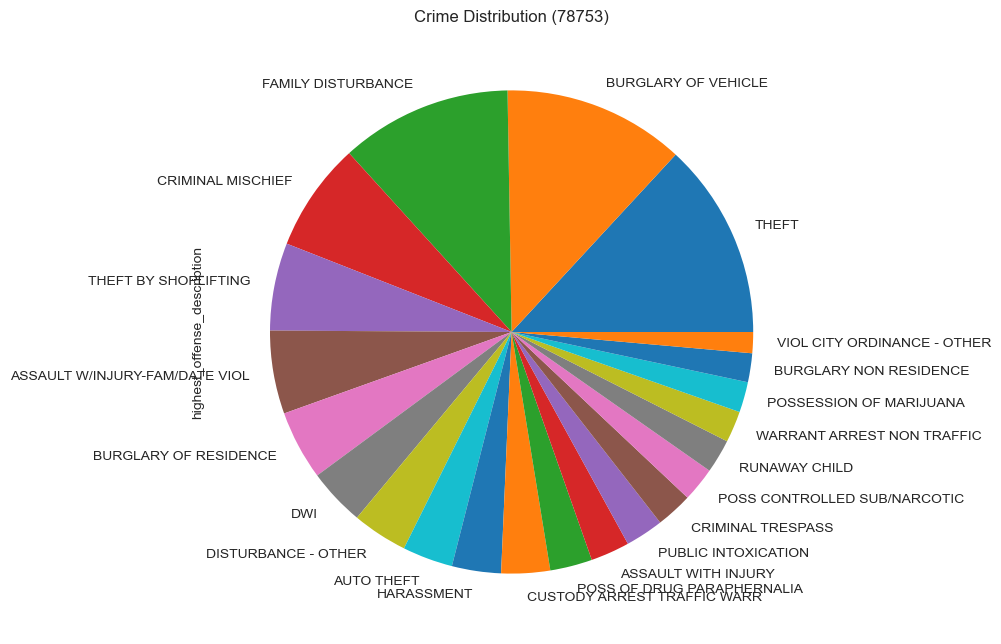

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    21010
BURGLARY OF VEHICLE                                   20110
THEFT                                                 15948
CRIMINAL MISCHIEF                                     11299
ASSAULT W/INJURY-FAM/DATE VIOL                         9832
BURGLARY OF RESIDENCE                                  9027
PUBLIC INTOXICATION                                    6464
CUSTODY ARREST TRAFFIC WARR                            6049
DWI                                                    5854
HARASSMENT                                             5647
DISTURBANCE - OTHER                                    5309
AUTO THEFT                                             4888
ASSAULT WITH INJURY                                    4692
CRIMINAL TRESPASS                                      4050
POSS CONTROLLED SUB/NARCOTIC                           3980
POSSESSION OF MARIJUANA                                3868
THEFT BY SHOPLIFTING                                   3631
POSS OF DRUG PARAPHERNALIA                             3585
WARRANT ARREST NON TRAFFIC                             3478
RUNAWAY CHILD                                          2822
VIOL CITY ORDINANCE - OTHER                            2214

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098710
BURGLARY OF VEHICLE                                0.094482
THEFT                                              0.074928
CRIMINAL MISCHIEF                                  0.053086
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046193
BURGLARY OF RESIDENCE                              0.042411
PUBLIC INTOXICATION                                0.030370
CUSTODY ARREST TRAFFIC WARR                        0.028420
DWI                                                0.027504
HARASSMENT                                         0.026531
DISTURBANCE - OTHER                                0.024943
AUTO THEFT                                         0.022965
ASSAULT WITH INJURY                                0.022044
CRIMINAL TRESPASS                                  0.019028
POSS CONTROLLED SUB/NARCOTIC                       0.018699
POSSESSION OF MARIJUANA                            0.018173
THEFT BY SHOPLIFTING                               0.017059
POSS OF DRUG PARAPHERNALIA                         0.016843
WARRANT ARREST NON TRAFFIC                         0.016341
RUNAWAY CHILD                                      0.013258
VIOL CITY ORDINANCE - OTHER                        0.010402

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

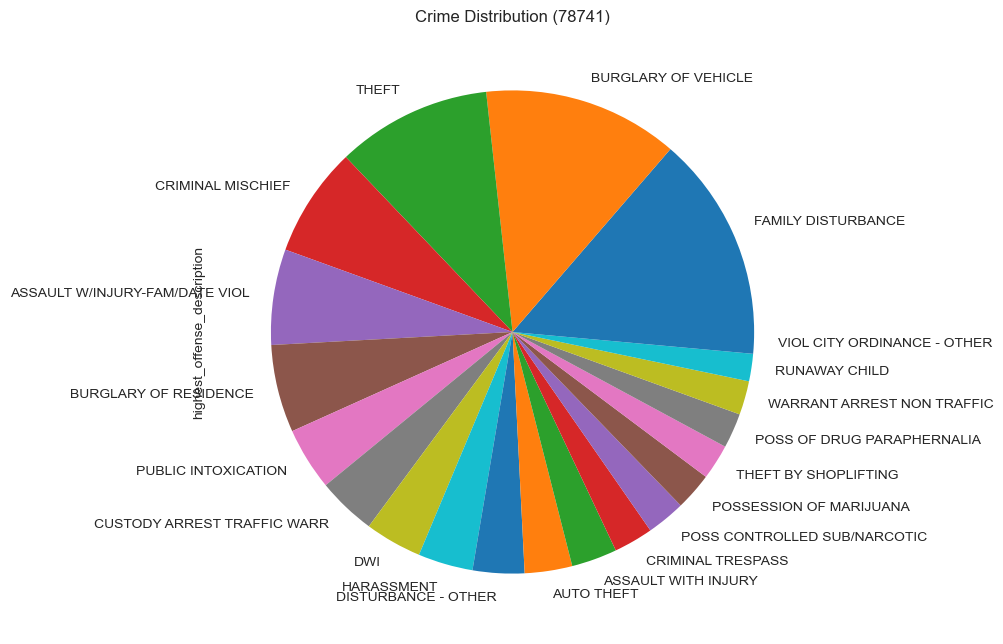

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15371
BURGLARY OF VEHICLE                                   14778
THEFT                                                 13197
CRIMINAL MISCHIEF                                      8637
BURGLARY OF RESIDENCE                                  5937
ASSAULT W/INJURY-FAM/DATE VIOL                         5868
HARASSMENT                                             5202
DISTURBANCE - OTHER                                    4584
DWI                                                    4352
PUBLIC INTOXICATION                                    3957
CUSTODY ARREST TRAFFIC WARR                            3174
AUTO THEFT                                             2968
BURGLARY NON RESIDENCE                                 2913
ASSAULT WITH INJURY                                    2721
RUNAWAY CHILD                                          2627
POSSESSION OF MARIJUANA                                2555
WARRANT ARREST NON TRAFFIC                             2046
POSS CONTROLLED SUB/NARCOTIC                           2016
CRIMINAL TRESPASS                                      1944
IDENTITY THEFT                                         1685
POSS OF DRUG PARAPHERNALIA                             1512
THEFT BY SHOPLIFTING                                   1509

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.101327
BURGLARY OF VEHICLE                                0.097418
THEFT                                              0.086996
CRIMINAL MISCHIEF                                  0.056936
BURGLARY OF RESIDENCE                              0.039137
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038682
HARASSMENT                                         0.034292
DISTURBANCE - OTHER                                0.030218
DWI                                                0.028689
PUBLIC INTOXICATION                                0.026085
CUSTODY ARREST TRAFFIC WARR                        0.020923
AUTO THEFT                                         0.019565
BURGLARY NON RESIDENCE                             0.019203
ASSAULT WITH INJURY                                0.017937
RUNAWAY CHILD                                      0.017317
POSSESSION OF MARIJUANA                            0.016843
WARRANT ARREST NON TRAFFIC                         0.013487
POSS CONTROLLED SUB/NARCOTIC                       0.013290
CRIMINAL TRESPASS                                  0.012815
IDENTITY THEFT                                     0.011108
POSS OF DRUG PARAPHERNALIA                         0.009967
THEFT BY SHOPLIFTING                               0.009947

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

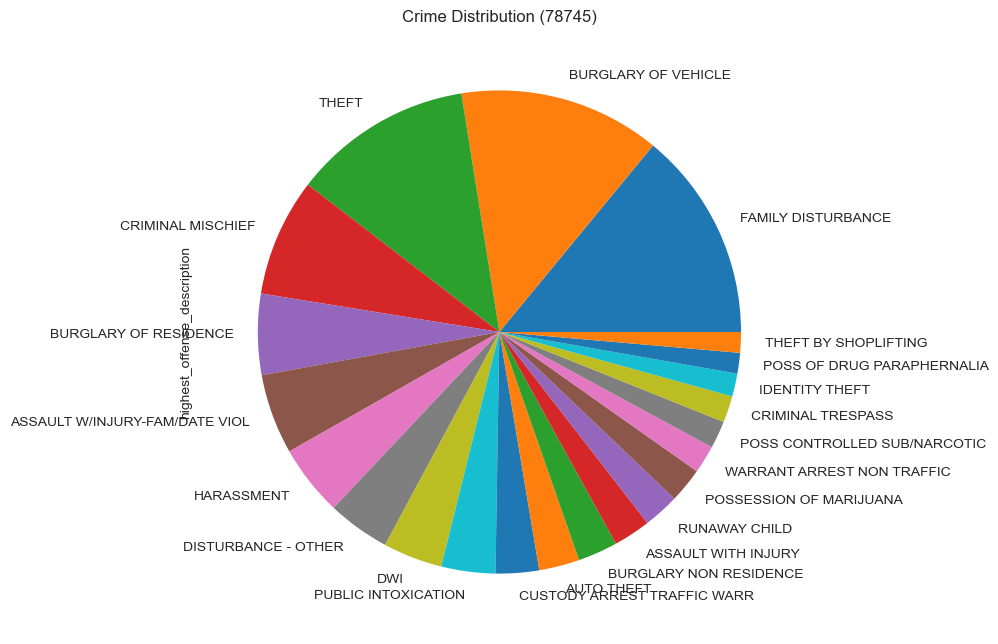

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8734
THEFT                                                  5641
CRIMINAL MISCHIEF                                      5031
THEFT OF BICYCLE                                       3570
PUBLIC INTOXICATION                                    2624
BURGLARY OF RESIDENCE                                  2169
WARRANT ARREST NON TRAFFIC                             1516
AUTO THEFT                                             1446
CRIMINAL TRESPASS                                      1387
ASSAULT WITH INJURY                                    1257
FAMILY DISTURBANCE                                     1245
HARASSMENT                                             1244
DWI                                                    1192
DISTURBANCE - OTHER                                    1131
BURGLARY NON RESIDENCE                                  905
CRIMINAL TRESPASS/TRANSIENT                             863
GRAFFITI                                                785
CUSTODY ARREST TRAFFIC WARR                             768
VIOL CITY ORDINANCE - OTHER                             755
ASSAULT W/INJURY-FAM/DATE VIOL                          712
POSSESSION OF MARIJUANA                                 663
SUSPICIOUS PERSON                                       629

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.150185
THEFT                                              0.096999
CRIMINAL MISCHIEF                                  0.086510
THEFT OF BICYCLE                                   0.061388
PUBLIC INTOXICATION                                0.045121
BURGLARY OF RESIDENCE                              0.037297
WARRANT ARREST NON TRAFFIC                         0.026068
AUTO THEFT                                         0.024865
CRIMINAL TRESPASS                                  0.023850
ASSAULT WITH INJURY                                0.021615
FAMILY DISTURBANCE                                 0.021408
HARASSMENT                                         0.021391
DWI                                                0.020497
DISTURBANCE - OTHER                                0.019448
BURGLARY NON RESIDENCE                             0.015562
CRIMINAL TRESPASS/TRANSIENT                        0.014840
GRAFFITI                                           0.013498
CUSTODY ARREST TRAFFIC WARR                        0.013206
VIOL CITY ORDINANCE - OTHER                        0.012983
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012243
POSSESSION OF MARIJUANA                            0.011401
SUSPICIOUS PERSON                                  0.010816

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

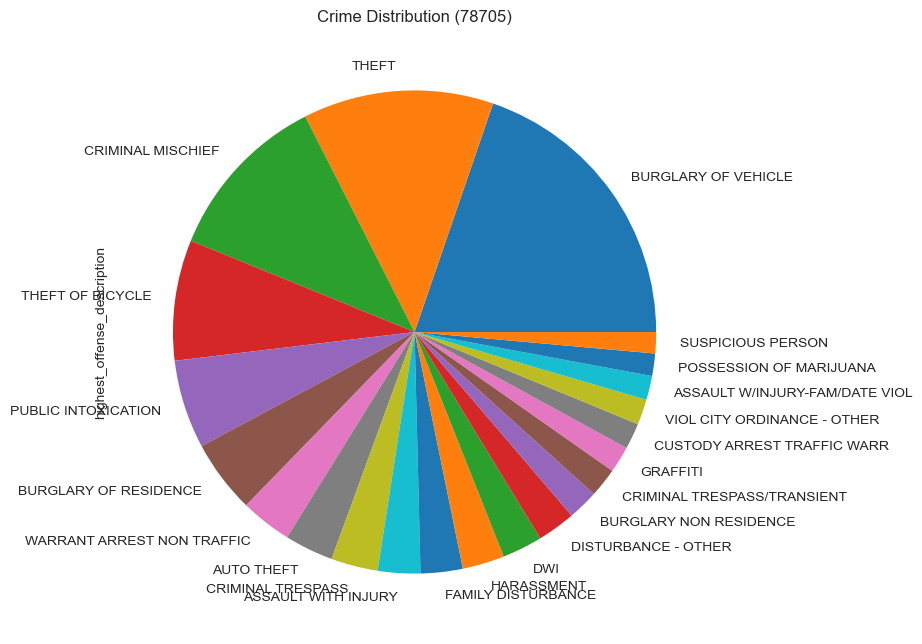

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5473
THEFT                                                  5368
THEFT BY SHOPLIFTING                                   2573
CRIMINAL MISCHIEF                                      1304
DWI                                                     895
FAMILY DISTURBANCE                                      788
HARASSMENT                                              645
VIOL CITY ORDINANCE - OTHER                             639
AUTO THEFT                                              629
BURGLARY OF RESIDENCE                                   529
THEFT FROM PERSON                                       473
IDENTITY THEFT                                          459
DISTURBANCE - OTHER                                     457
BURGLARY NON RESIDENCE                                  375
ASSAULT W/INJURY-FAM/DATE VIOL                          352
CRED CARD ABUSE - OTHER                                 337
PUBLIC INTOXICATION                                     334
POSSESSION OF MARIJUANA                                 310
FRAUD - OTHER                                           286
SUSPICIOUS PERSON                                       263
CUSTODY ARREST TRAFFIC WARR                             247
THEFT OF BICYCLE                                        243
WARRANT ARREST NON TRAFFIC                              227
ASSAULT WITH INJURY                                     215

highest_offense_description
BURGLARY OF VEHICLE                                0.187656
THEFT                                              0.184056
THEFT BY SHOPLIFTING                               0.088222
CRIMINAL MISCHIEF                                  0.044711
DWI                                                0.030687
FAMILY DISTURBANCE                                 0.027019
HARASSMENT                                         0.022116
VIOL CITY ORDINANCE - OTHER                        0.021910
AUTO THEFT                                         0.021567
BURGLARY OF RESIDENCE                              0.018138
THEFT FROM PERSON                                  0.016218
IDENTITY THEFT                                     0.015738
DISTURBANCE - OTHER                                0.015669
BURGLARY NON RESIDENCE                             0.012858
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012069
CRED CARD ABUSE - OTHER                            0.011555
PUBLIC INTOXICATION                                0.011452
POSSESSION OF MARIJUANA                            0.010629
FRAUD - OTHER                                      0.009806
SUSPICIOUS PERSON                                  0.009018
CUSTODY ARREST TRAFFIC WARR                        0.008469
THEFT OF BICYCLE                                   0.008332
WARRANT ARREST NON TRAFFIC                         0.007783
ASSAULT WITH INJURY                                0.007372

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

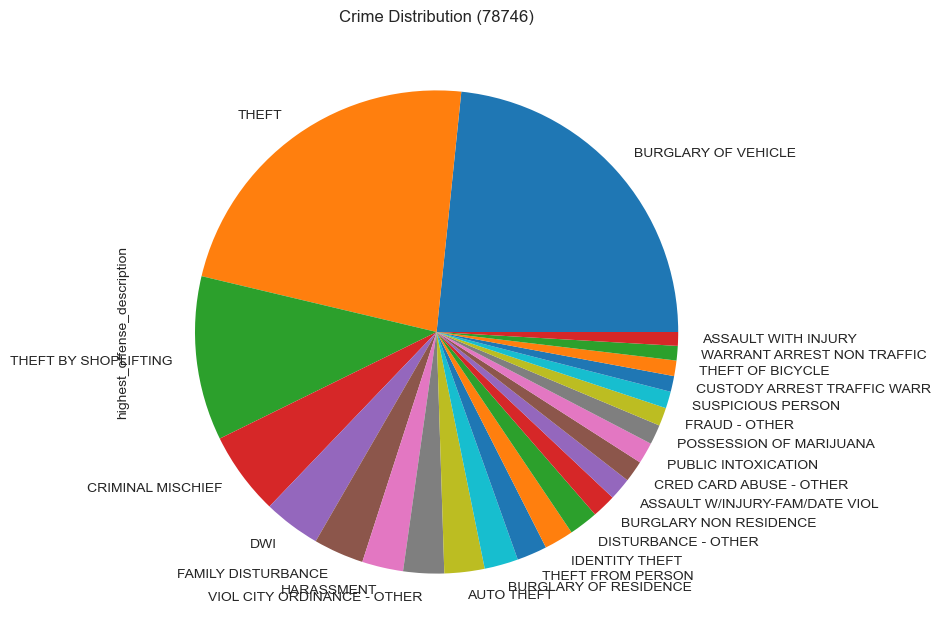

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

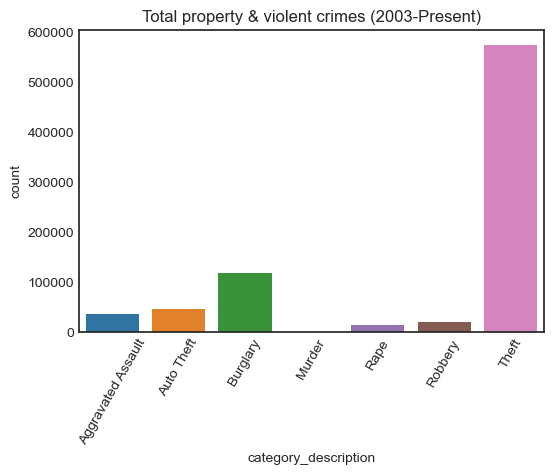

Theft                 574542
Burglary              118182
Auto Theft             46198
Aggravated Assault     36425
Robbery                20729
Rape                   13715
Murder                   574
Name: category_description, dtype: int64

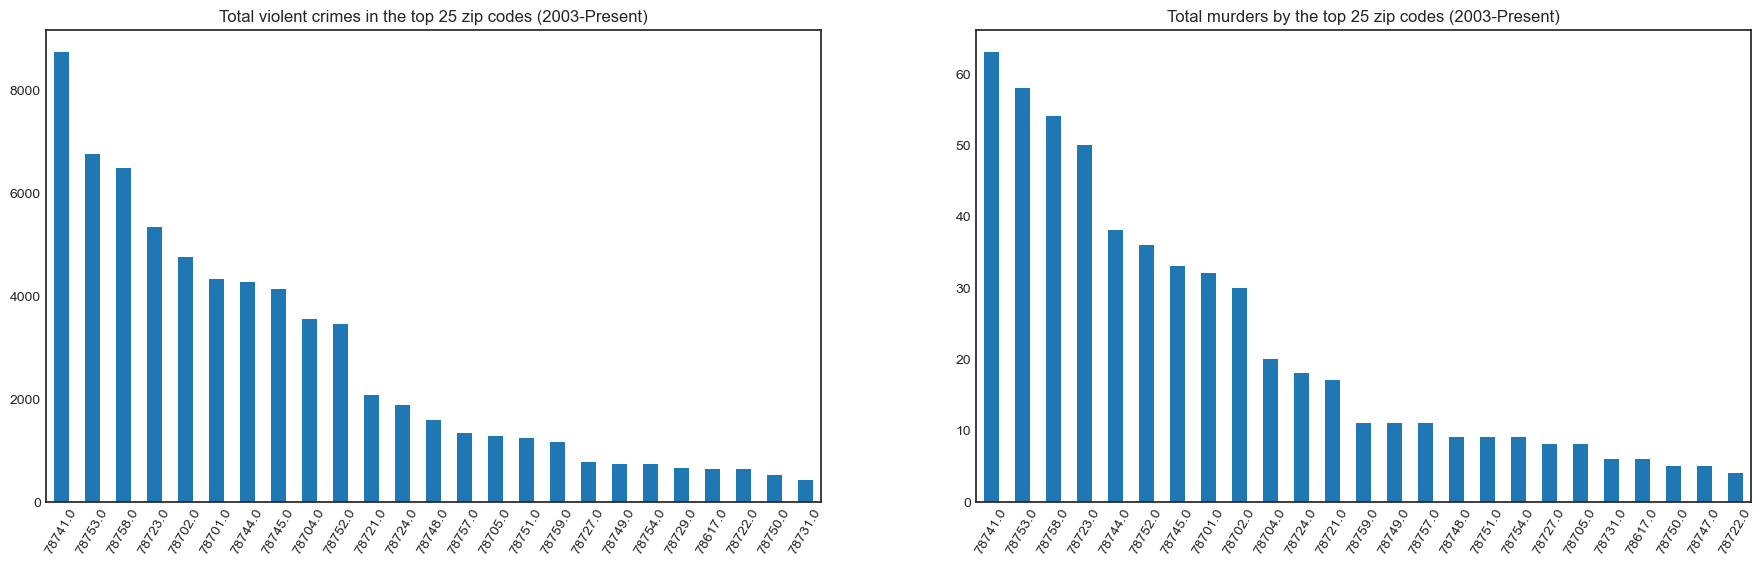

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    31       61
78617.0                              368       6   158      107
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        0
78653.0                               36       0     6        4
78660.0                              164       3    43       51
78664.0                                7       0     7        0
78665.0                                0       0     1        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2129      32   783     1386
78702.0                             2445      30   625     1644
78703.0                              171       2    85      112
78704.0                             1705      20   799     1027
78705.0                              502       8   454      317
78712.0                                7       0     4        4
78717.0                              158       1    48       41
78719.0                               21       0     3        9
78721.0                             1297      17   313      448
78722.0                              282       4   100      251
78723.0                             2677      50   820     1783
78724.0                             1161      18   356      340
78725.0                               80       1    42       13
78726.0                              178       2    93       32
78727.0                              425       8   176      157
78728.0                               21       1    11        3
78729.0                              351       2   151      139
78730.0                               34       0    18        4
78731.0                              197       6   120       93
78732.0                                3       0     2        2
78733.0                                2       0     5        1
78735.0                              227       3    76       46
78736.0                               61       0    31       15
78737.0                                8       0     5        2
78738.0                                1       0     0        0
78739.0                               35       0    37        3
78741.0                             4248      63  1383     3038
78742.0                               73       1    22       23
78744.0                             2377      38   904      948
78745.0                             2236      33   857     1010
78746.0                              136       3    79      134
78747.0                              245       5    96       47
78748.0                              868       9   388      325
78749.0                              361      11   208      145
78750.0                              266       5   138      108
78751.0                              538       9   285      399
78752.0                             1686      36   501     1223
78753.0                             3427      58  1145     2131
78754.0                              400       9   165      147
78756.0                              158       2    99       99
78757.0                              683      11   231      405
78758.0                             3199      54  1113     2120
78759.0                              580      11   263      295

<Figure size 432x288 with 0 Axes>

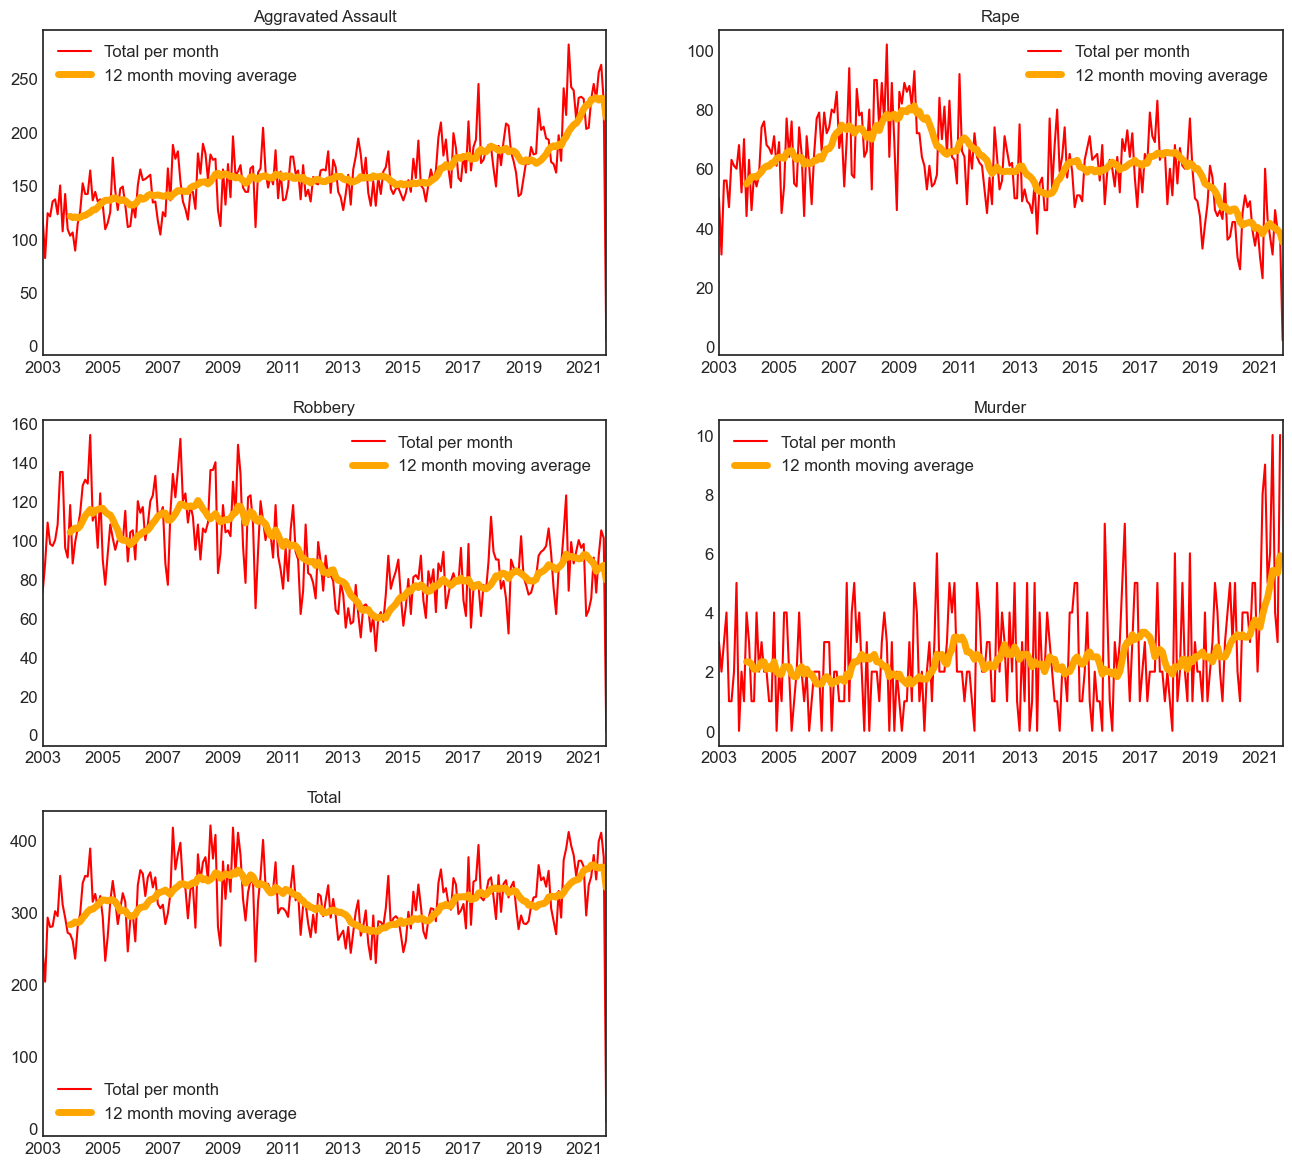

In [19]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    #     xlabel="Zip Code",
    #     ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    #     xlabel="Zip Code",
    #     ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

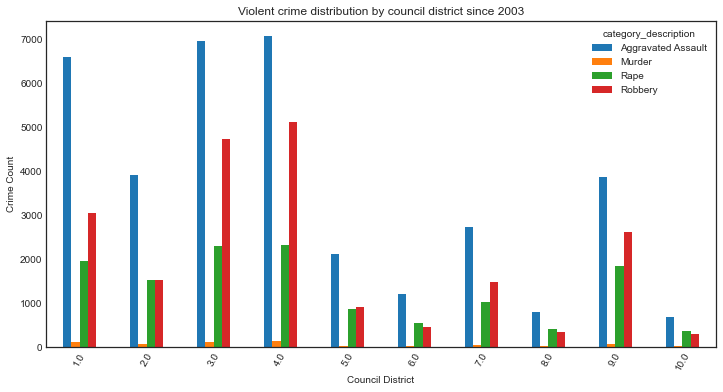

<Figure size 600x400 with 0 Axes>

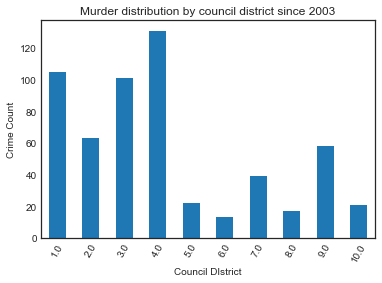

<Figure size 600x400 with 0 Axes>

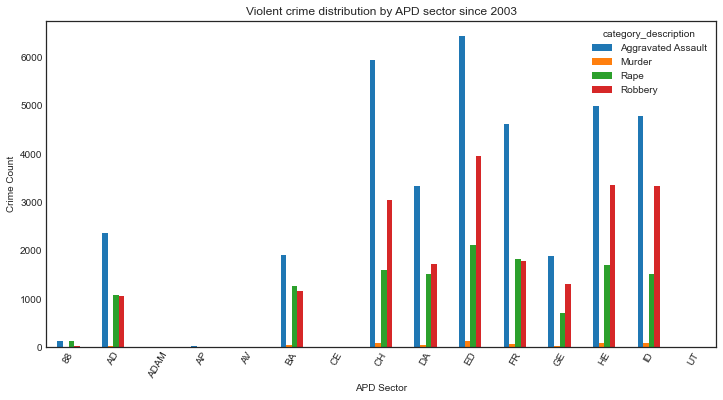

<Figure size 600x400 with 0 Axes>

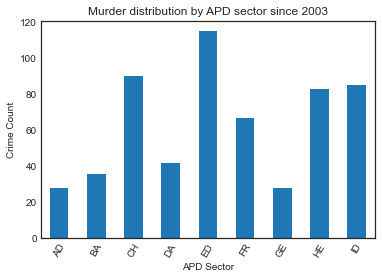

<Figure size 600x400 with 0 Axes>

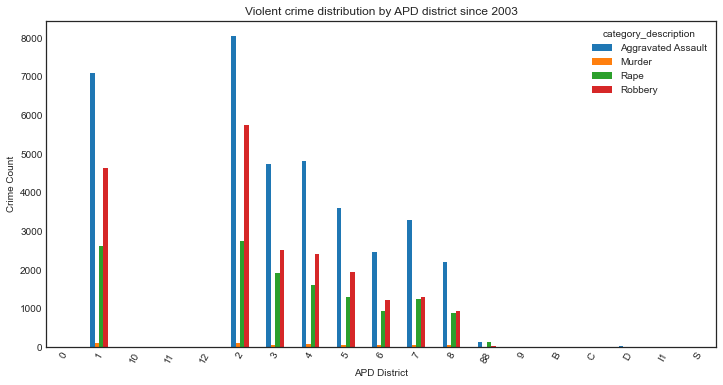

<Figure size 600x400 with 0 Axes>

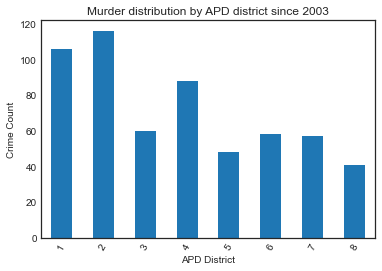

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         3       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               765      12   
CAMP / CAMPGROUND                                               50       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   411       9   
COMMUNITY CENTER                                                10       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              294       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     64       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             127       6   
FIELD / WOODS                                                  295      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         283       8   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           74       2   
HOTEL / MOTEL / ETC.                                           797      15   
INDUSTRIAL SITE                                                  6       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 11       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                473      13   
PARK / PLAYGROUND                                              196       1   
PARKING LOTS / GARAGE                                         5028     108   
RENTAL STORAGE FACILITY                                         21       1   
RESIDENCE / HOME                                             18121     240   
REST AREA                                                        2       0   
RESTAURANTS                                                    263       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      24       0   
SHOPPING MALL                                                   11       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 53       0   
STREETS / HWY / ROAD / ALLEY                                  8558     120   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 110       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        1  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      401  
BAR / NIGHT CLUB                                 162   

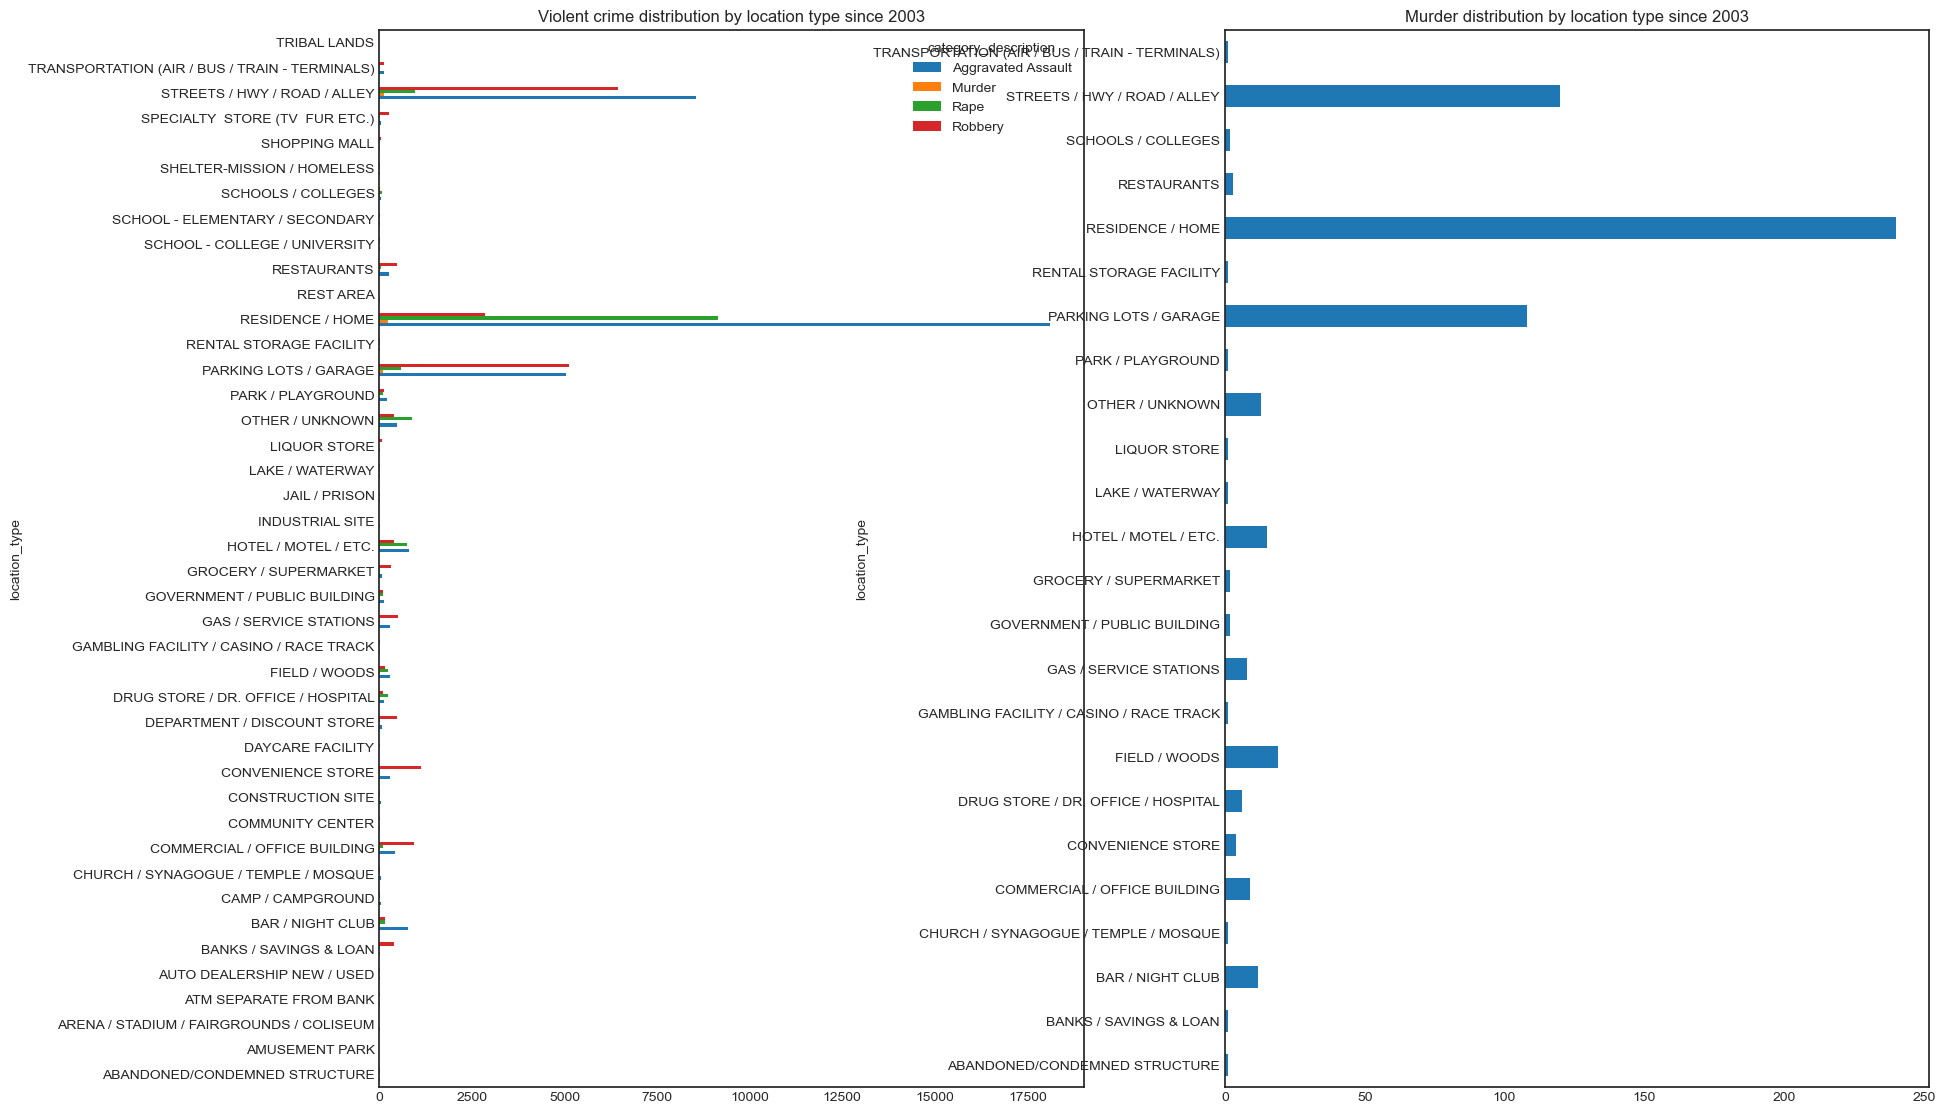

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    165
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      144
500 E 7TH ST                        136
1030 NORWOOD PARK BLVD              135
6409 SPRINGDALE RD                  132
1700 BURTON DR                      127
1071 CLAYTON LN                     117
9024 NORTHGATE BLVD                 116
6103 MANOR RD                       114
9200 NORTH PLZ                      108
1124 RUTLAND DR                     106
1054 SPRINGDALE RD                  103
2901 S CAPITAL OF TEXAS HWY NB       98
9601 MIDDLE FISKVILLE RD             98
5800 TECHNI CENTER DR                96
9515 N LAMAR BLVD                    95
1500 FARO DR                         94
10000 N LAMAR BLVD                   93
12151 N IH 35 SVRD NB                92
1000 E 41ST ST                       92
6118 FAIRWAY ST                      91
7020 GRAND CANYON DR                 89
700 BLOCK E 8TH ST                   89
8800 N IH 35 SVRD SB                 88
9300 NORTHGATE BLVD                  87
2237 E RIVERSIDE DR                  85
1515 WICKERSHAM LN                   85
2401 S LAKESHORE BLVD                84
2500 BLOCK S CONGRESS AVE            84
9010 GALEWOOD DR                     81
8312 N IH 35 SVRD SB                 81
1300 CROSSING PL                     80
6855 E US 290 HWY SVRD EB            79
7000 DECKER LN                       79
2201 WILLOW CREEK DR                 79
3909 N IH 35 SVRD NB                 77
1845 BURTON DR                       77
4900 BLOCK MUELLER BLVD              75
9001 NORTHGATE BLVD                  75
2400 WICKERSHAM LN                   74
8926 N LAMAR BLVD                    74
1601 ROYAL CREST DR                  73
4404 E OLTORF ST                     72
2005 WILLOW CREEK DR                 72
2101 BURTON DR                       72
1600 WICKERSHAM LN                   70
919 E 32ND ST                        68
2200 S PLEASANT VALLEY RD            68
3603 SOUTHRIDGE DR                   68

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
601 E 15TH ST                    3
6407 SPRINGDALE RD               3
4700 E RIVERSIDE DR              3
6409 SPRINGDALE RD               3
8610 N LAMAR BLVD                3
8800 N IH 35 SVRD SB             3
9010 GALEWOOD DR                 2
2501 ANKEN DR                    2
9200 NORTH PLZ                   2
7000 DECKER LN                   2
8912 N LAMAR BLVD                2
9220 N IH 35 SVRD SB             2
2400 WICKERSHAM LN               2
7100 N IH 35 SVRD SB             2
6600 ED BLUESTEIN BLVD SB        2
1050 SPRINGDALE RD               2
815 W SLAUGHTER LN               2
201 W 5TH ST                     2
605 MASTERSON PASS               2
2713 S CONGRESS AVE              2
2400 E RIVERSIDE DR              2
1137 GUNTER ST                   2
1711 RUTLAND DR                  2
10503 N LAMAR BLVD               2
4900 E OLTORF ST                 2
1200 BLOCK E 38TH HALF ST        2
2915 S IH 35 SVRD NB             2
200 BLOCK E 6TH ST               2
9036 N LAMAR BLVD                2
833 FAIRFIELD DR                 2
744 W WILLIAM CANNON DR          2
2508 E RIVERSIDE DR              2
6118 FAIRWAY ST                  2
11105 N IH 35 SVRD NB            2
10610 MORADO CIR                 2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")